In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from plotly.offline import iplot
import plotly.graph_objs as go
import matplotlib.dates as mdates
from wordcloud import WordCloud

In [ ]:
df_train = pd.read_csv("/content/gdrive/My Drive/harshitha/train.csv", encoding='utf-8')


In [ ]:
print(df_train.shape)
df_train.head()

(20800, 5)


,id,title,author,text,label
0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,1
1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,0
2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",1
3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,1
4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...,1


In [ ]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20800 entries, 0 to 20799
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      20800 non-null  int64 
 1   title   20242 non-null  object
 2   author  18843 non-null  object
 3   text    20761 non-null  object
 4   label   20800 non-null  int64 
dtypes: int64(2), object(3)
memory usage: 812.6+ KB


In [ ]:
df_train.isnull().sum()

id           0
title      558
author    1957
text        39
label        0
dtype: int64

<Axes: >

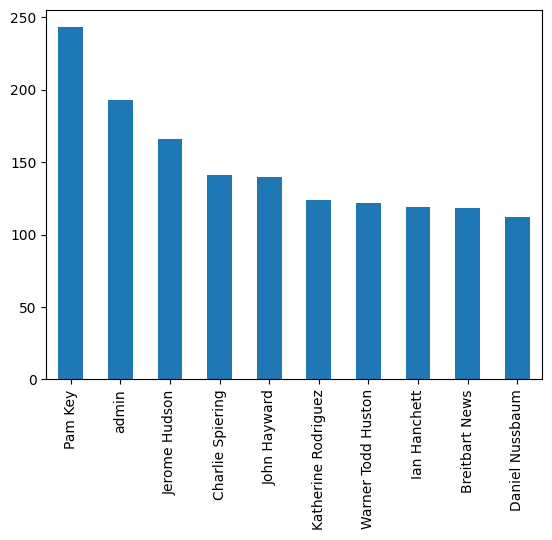

In [ ]:
df_train.author.value_counts()[:10].plot(kind='bar')

In [ ]:
# Plot wordCloud for entire text column
def word_rep(df, label_value):
  from wordcloud import WordCloud
  wordcloud__ = WordCloud(
                          background_color='white',
                          max_words=250,
                          max_font_size=40,
                          random_state=1705
                         ).generate(str(df['text'].dropna()))
  def cloud_plot(wordcloud):
    fig = plt.figure(1, figsize=(8,6))
    plt.title('Word Cloud Representation For {}'.format(label_value))
    plt.imshow(wordcloud)
    plt.axis('off')
    plt.show()

  cloud_plot(wordcloud__)

# Wordcloud Representation for Text

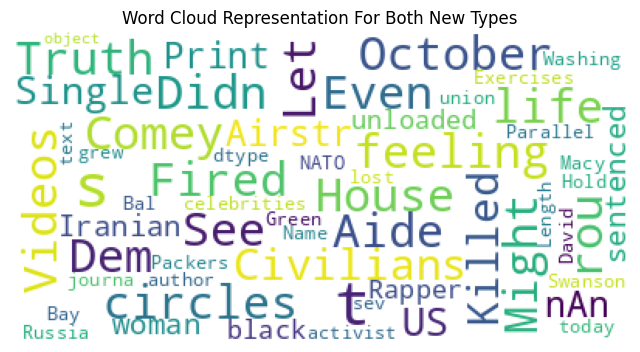

In [ ]:
word_rep(df_train, 'Both New Types')

# WordCloud Representation for label 1: Fake

In [ ]:
fake_news = df_train[df_train.label==1 ]     # extract Fake news values from train dataframe object.

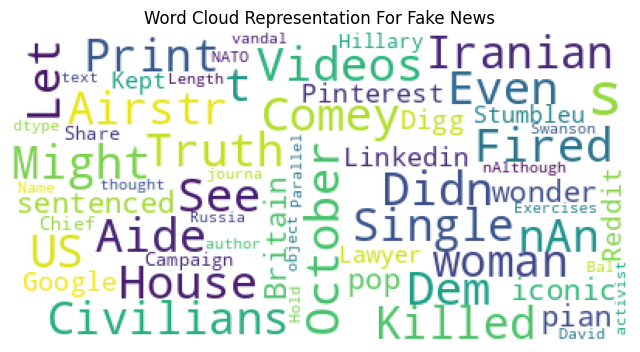

In [ ]:
word_rep(fake_news,'Fake News')

# Wordcloud representation for label 0: Real

In [ ]:
real_news = df_train[df_train.label==0 ]     # extract real news values from train dataframe object.

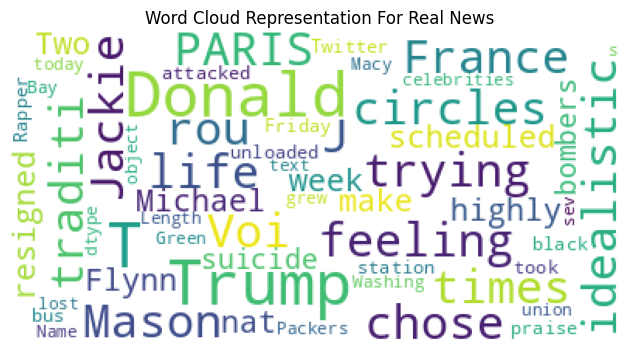

In [ ]:
word_rep(real_news,'Real News')

In [ ]:
#Group wise count for each label
temp = df_train.groupby('label').count()['text'].reset_index().sort_values(by='text',ascending=False)  # get the count of each label
temp.style.background_gradient(cmap='Purples')

,label,text
0,0,10387
1,1,10374


## Character count in each news type

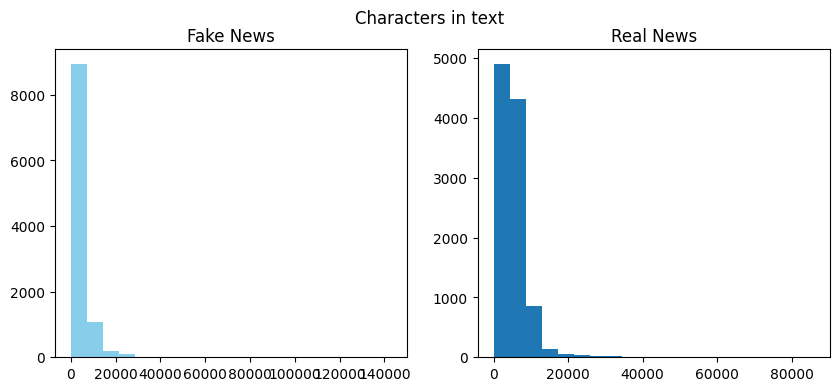

In [ ]:
fig,(ax1,ax2)= plt.subplots(ncols=2, figsize=(10, 4), dpi=100)
length=df_train[df_train["label"]==1]['text'].str.len()
ax1.hist(length,bins = 20,color='skyblue')
ax1.set_title('Fake News')
length=df_train[df_train["label"]==0]['text'].str.len()
ax2.hist(length, bins = 20)
ax2.set_title('Real News')
fig.suptitle('Characters in text')
plt.show()


In [ ]:
# Remove Duplicates
df_train.drop_duplicates(subset=['text'],keep='first',inplace=True)
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20387 entries, 0 to 20799
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      20387 non-null  int64 
 1   title   19869 non-null  object
 2   author  18533 non-null  object
 3   text    20386 non-null  object
 4   label   20387 non-null  int64 
dtypes: int64(2), object(3)
memory usage: 955.6+ KB


There are no duplicate values found.